## PROBLEM STATEMENT: 
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most

## BUSINESS OBJECTIVE :
there might be some subjectivity in the final number of countries that you think should be reported back to the CEO since they depend upon the preceding analysis as well. Here, make sure that you report back at least 5 countries which are in direst need of aid from the analysis work that you perform.

## The steps are broadly:

1.Read and understand the data

2.Clean the data

3.Prepare the data for modelling

4.Modelling

5.Final analysis and recommendations

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# filter out warnings 
import warnings 
warnings.filterwarnings('ignore')

## Read and understand the data

In [3]:
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# check the shape
df.shape

(167, 10)

In [5]:
# check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## clean the data 

In [6]:
# check the missing value
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

here there is no missing value in the dataset``

## In the data set imports,exports,health is given in percentage so we change it from percentage to their actual value

In [7]:
df['exports'] = (df['exports']*df['gdpp'])
df['imports'] = (df['imports']*df['gdpp'])
df['health'] = (df['health']*df['gdpp'])

In [8]:
df['exports'] = (df['exports']/100)
df['imports'] = (df['imports']/100)
df['health'] = (df['health']/100)

In [9]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## EDA 


## UNIVARIATE ANALYSIS

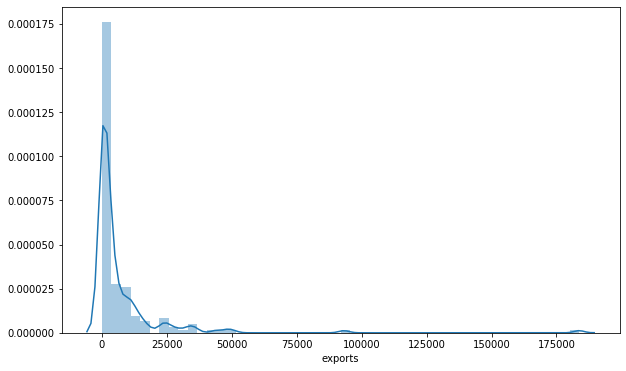

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(df['exports'])
plt.show()

as we seen from distplot that countries with low income are dependend more on exports.

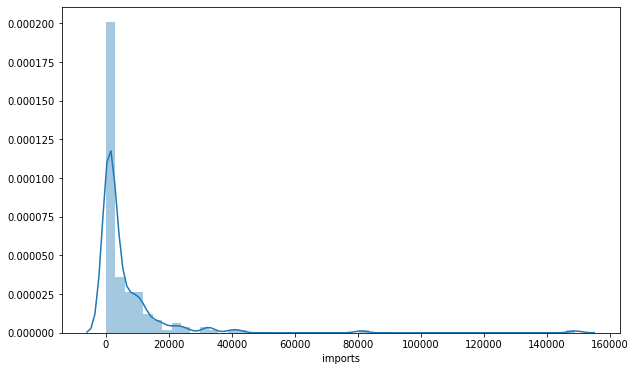

In [11]:
plt.figure(figsize=(10,6))
plt.subplot()
sns.distplot(df['imports'])
plt.show()

high income countries are low on imports

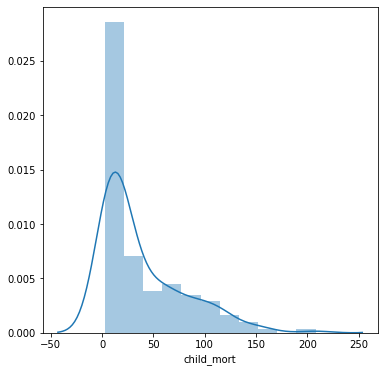

In [12]:
plt.figure(figsize=(6,6))
plt.subplot()
sns.distplot(df['child_mort'])
plt.show()

child mortality is more on poor countries

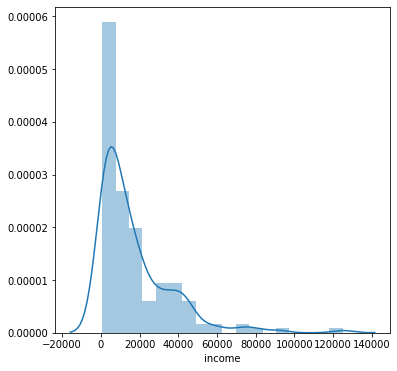

In [13]:
plt.figure(figsize=(6,6))
plt.subplot()
sns.distplot(df['income'])
plt.show()

income is normally distributed

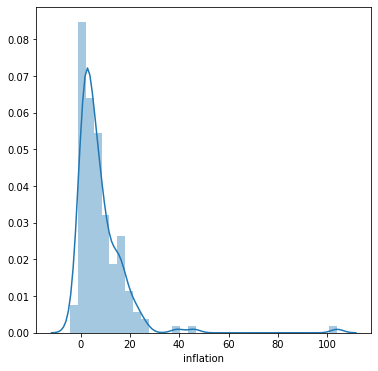

In [14]:
plt.figure(figsize=(6,6))
plt.subplot()
sns.distplot(df['inflation'])
plt.show()

inflation is also normally distributed

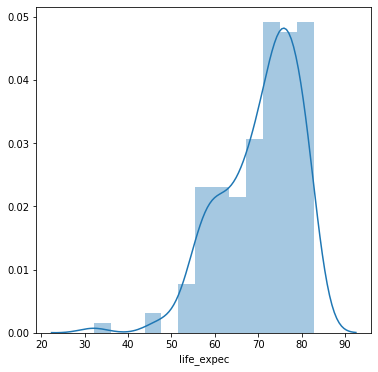

In [15]:
plt.figure(figsize=(6,6))
plt.subplot()
sns.distplot(df['life_expec'])
plt.show()

life expentancy is high in  between 60 to 80

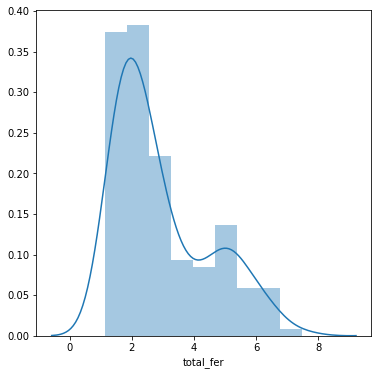

In [16]:
plt.figure(figsize=(6,6))
plt.subplot()
sns.distplot(df['total_fer'])
plt.show()

total fertilation is not normally distributted but maximum is 2

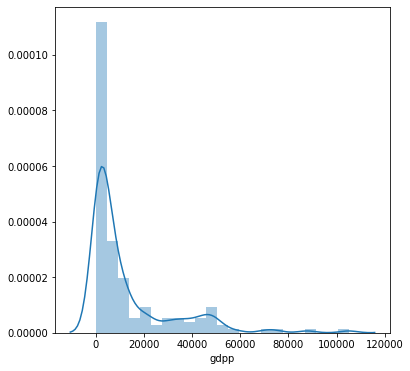

In [17]:
plt.figure(figsize=(6,6))
plt.subplot()
sns.distplot(df['gdpp'])
plt.show()

gdpp is also notr normally distributed

## BIVARIATE ANALYSIS

for gdpp and income

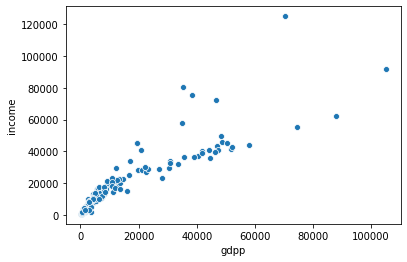

In [18]:
sns.scatterplot(x=df['gdpp'],y=df['income'],data=df)
plt.show()
    

as we seen low income countries have low gdpp

In [19]:
# for gdpp and child mortality

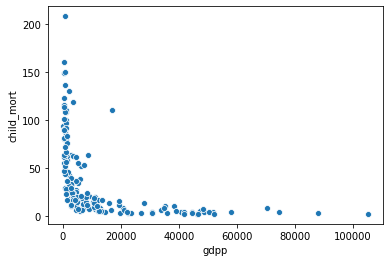

In [20]:
sns.scatterplot(x=df['gdpp'],y=df['child_mort'],data=df)
plt.show()

the countries in which there is low gdpp child mortality is maximum

In [21]:
# for income and child mortality

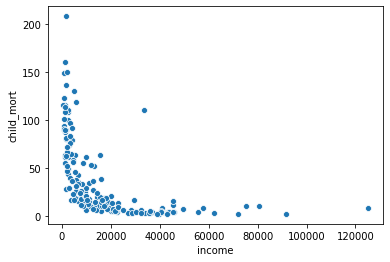

In [22]:
sns.scatterplot(x=df['income'],y=df['child_mort'],data=df)
plt.show()

the countries where income is low is high child mortality

# OUTLIER ANALYSIS

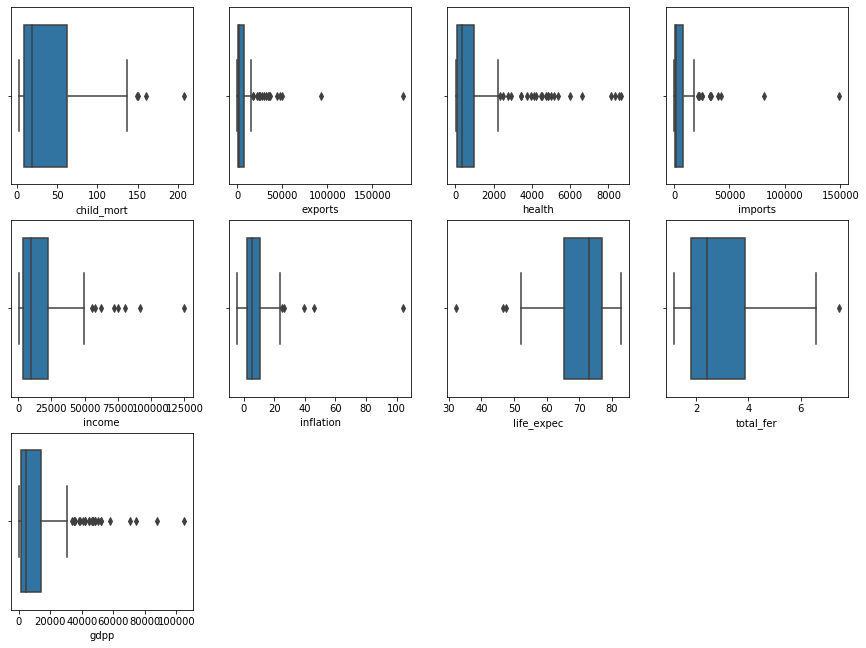

In [23]:
plt.figure(figsize = (15,15))
f = df.columns[1:]
for i in enumerate(f):
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(x = i[1], data =df)

as we seen there are outliers in gdpp,income,and child mortality so we can remove some outliers in gdpp and income 

In [24]:


# outlier treatment for income
Q1 = df.income.quantile(0.05)
Q3 = df.income.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.income <= Q3 + 1.5*IQR)]

# outlier treatment for gdpp
Q1 = df.gdpp.quantile(0.05)
Q3 = df.gdpp.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.gdpp <= Q3 + 1.5*IQR)]

## HOPKINS STATISTICS

In [25]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H


In [26]:
hopkins(df.drop('country', axis =1))

0.9339905000647255

here it is around 90 above score so it good for clustering

### SCALING

In [27]:
ss = StandardScaler()
df1 = ss.fit_transform(df.drop('country', axis = 1))
df1

array([[ 1.28534081, -0.40261552, -0.56264875, ..., -1.61313051,
         1.89561575, -0.67873209],
       [-0.54257178, -0.34121063, -0.43719837, ...,  0.65399019,
        -0.86176665, -0.47976613],
       [-0.27682905, -0.30924111, -0.48267198, ...,  0.67654861,
        -0.0418256 , -0.45895261],
       ...,
       [-0.37617213, -0.3525913 , -0.53617576, ...,  0.29305555,
        -0.66339381, -0.63614876],
       [ 0.44340824, -0.38358953, -0.54824795, ..., -0.33858006,
         1.13518655, -0.63614876],
       [ 1.10900685, -0.37529629, -0.53817983, ..., -2.08685722,
         1.61789379, -0.62771085]])

In [28]:
df1 = pd.DataFrame(df1)
df1.columns = df.columns[1:]
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.285341,-0.402616,-0.562649,-0.427442,-0.857748,0.156410,-1.613131,1.895616,-0.678732
1,-0.542572,-0.341211,-0.437198,-0.309029,-0.378307,-0.311873,0.653990,-0.861767,-0.479766
2,-0.276829,-0.309241,-0.482672,-0.349009,-0.207160,0.786464,0.676549,-0.041826,-0.458953
3,2.000611,-0.281829,-0.530069,-0.341254,-0.610536,1.382462,-1.173241,2.120438,-0.511268
4,-0.699037,-0.092988,-0.177521,0.044831,0.150116,-0.600412,0.710386,-0.544370,-0.023556


## KMEANS CLUSTERING

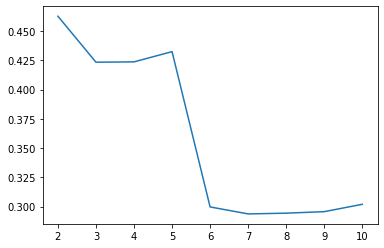

In [29]:
## silhouette analysis
ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])

sil =pd.DataFrame(ss)
plt.plot(sil[0], sil[1])

In [30]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.4626486532076536
For n_clusters=3, the silhouette score is 0.4233780992525895
For n_clusters=4, the silhouette score is 0.42365640325357423
For n_clusters=5, the silhouette score is 0.42924990027431154
For n_clusters=6, the silhouette score is 0.3823836021822089
For n_clusters=7, the silhouette score is 0.3115940732351768
For n_clusters=8, the silhouette score is 0.3063695571638154


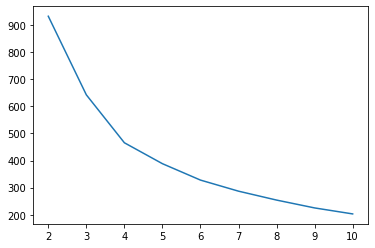

In [31]:
## Elbow Cuve
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])

so after checking silhouette score and elbow curve k = 3 is good for clustering

## KMEAN WITH K =3

In [32]:
kmean = KMeans(n_clusters = 3, random_state = 0)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [33]:
kmean.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [34]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [35]:
## Adding the labels with the original DF
df['cluster_id'] = kmean.labels_

In [36]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [37]:
# Check the number of Data Points in each cluster
df.cluster_id.value_counts()

1    91
0    48
2    27
Name: cluster_id, dtype: int64

## plotting the cluster with respect to data 
   we use gdpp,income,child mortality

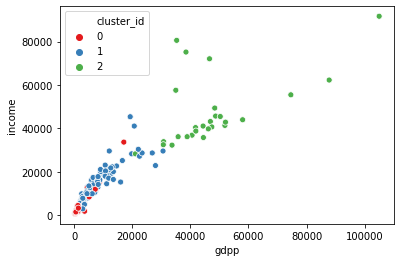

In [38]:
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_id', data = df, palette ='Set1')
plt.show()

as we seen from the plot cluster id 2 has maximum gdpp and income

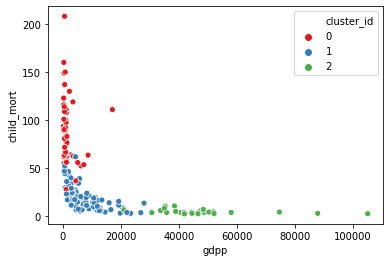

In [39]:
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_id', data = df, palette ='Set1')

child mortality is more in cluster 0 as it has low gdpp and high child mortality

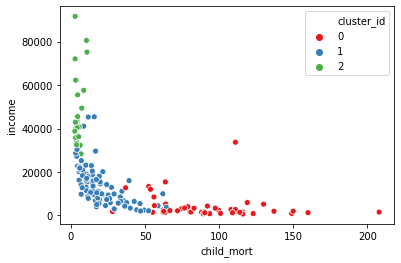

In [40]:
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_id', data = df, palette ='Set1')

child mortality is high in cluster 0 as it have low income

In [55]:
## CLUSTER PROFILING
df[['gdpp', 'child_mort','income','cluster_id']].groupby('cluster_id').mean()

,gdpp,child_mort,income
cluster_id,,,
0,1909.208333,91.610417,3897.354167
1,7979.912088,20.357143,13968.021978
2,47292.592593,4.900000,47407.407407


as we seen from cluster profiling we have to focus on cluster id 0 as it has low gdpp ,low income and high child mortality .These cluster id countries are in direct need of aid.

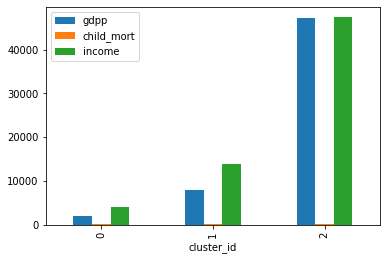

In [42]:
df[['gdpp', 'child_mort','income','cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

## top 10 countries which have low gdpp, low income, high child mortality requires aid are as follows:

In [43]:
c1 = df[df['cluster_id']==0]

In [44]:
c1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300,8.920,57.1,2.88,6350,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.810,57.9,5.87,575,0


In [45]:
c1.sort_values(by = ['child_mort','income','gdpp'], ascending = [False, True, True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,0
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,0
113,Nigeria,130.0,589.490,118.1310,405.420,5150,104.00,60.5,5.84,2330,0
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575,0


## HIERARCHICAL CLUSTERING

In [46]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.285341,-0.402616,-0.562649,-0.427442,-0.857748,0.156410,-1.613131,1.895616,-0.678732
1,-0.542572,-0.341211,-0.437198,-0.309029,-0.378307,-0.311873,0.653990,-0.861767,-0.479766
2,-0.276829,-0.309241,-0.482672,-0.349009,-0.207160,0.786464,0.676549,-0.041826,-0.458953
3,2.000611,-0.281829,-0.530069,-0.341254,-0.610536,1.382462,-1.173241,2.120438,-0.511268
4,-0.699037,-0.092988,-0.177521,0.044831,0.150116,-0.600412,0.710386,-0.544370,-0.023556


In [47]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


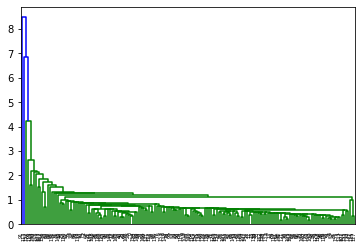

In [48]:
# single linkage
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

it is the single linkage which does not give any fair idea

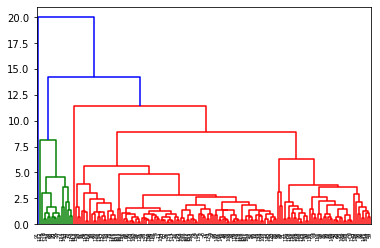

In [49]:
# complete linkage
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

in complete linkage we see that dendogram is built  and we can chose point 10 to cut these dendogram and get our k value

In [50]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [51]:
# assign cluster labels
df['cluster_labels'] = cluster_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1,0


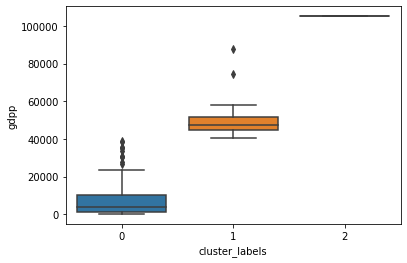

In [52]:
# plots
sns.boxplot(x='cluster_labels', y='gdpp', data=df)

we have to focus on cluster label o countries

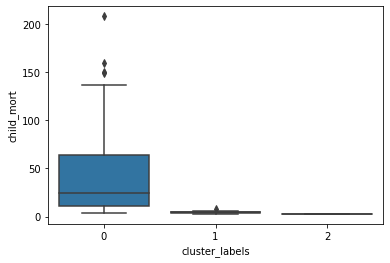

In [53]:
sns.boxplot(x='cluster_labels', y='child_mort', data=df)

we have to focus on cluster label o countries

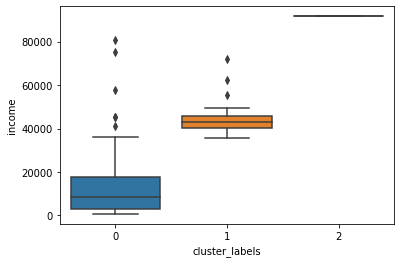

In [54]:
sns.boxplot(x='cluster_labels', y='income', data=df)

we have to focus on cluster label o countries

## RECOMMENDATIONS :

1. Top 5 countries which need direct aid on the basis of high child_mort ,low gdpp,low income are 

HAITI

SIERRA LEONE

CHAD

CENTRAL AFRICAN REPUBLIC

MALI
